In [1]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all')['data']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
data_vectorized = vectorizer.fit_transform(data)

In [3]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=20, random_state=0)
lda.fit(data_vectorized)

LatentDirichletAllocation(n_components=20, random_state=0)

In [4]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print_top_words(lda, vectorizer.get_feature_names_out(), 10)

Topic #0: 00 10 sun 1993 15 11 12 20 14 17
Topic #1: car good use like jpeg power don bit better edu
Topic #2: people don think say does just like know way believe
Topic #3: list mail send information health public faq insurance service internet
Topic #4: god jesus christian bible christ church christians faith rutgers lord
Topic #5: windows file dos program files use window ftp version available
Topic #6: key netcom com chip clipper keys encryption lines subject organization
Topic #7: armenian turkish armenians cwru cleveland people freenet armenia muslim western
Topic #8: edu university organization subject lines writes cs article posting host
Topic #9: edu com organization subject lines posting host nntp writes article
Topic #10: don just like edu time know think people said going
Topic #11: gun law government guns police state use rights control crime
Topic #12: space nasa new earth science research gov book time program
Topic #13: game team games year play hockey players win seaso

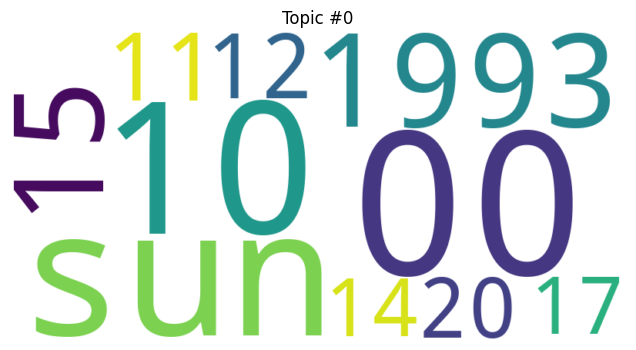

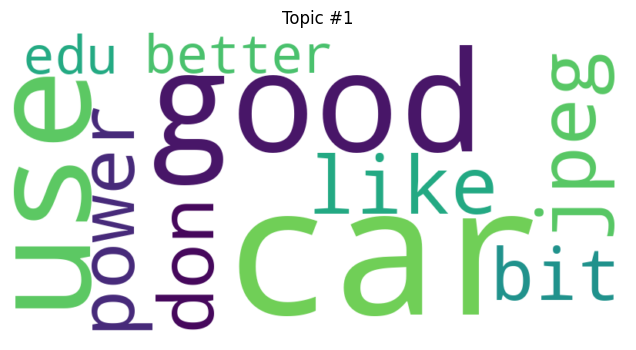

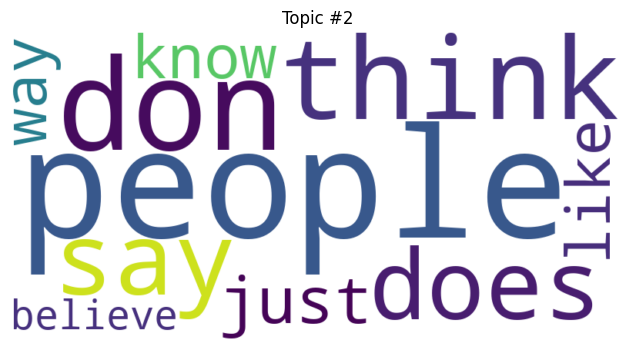

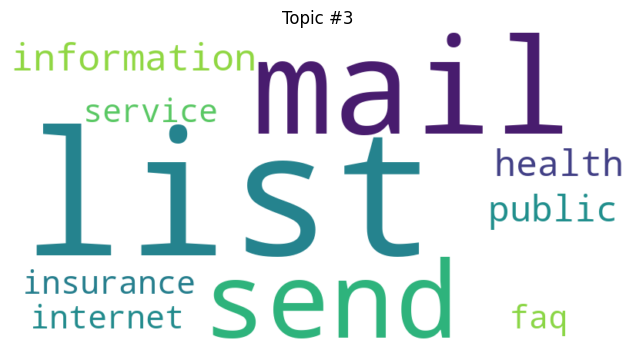

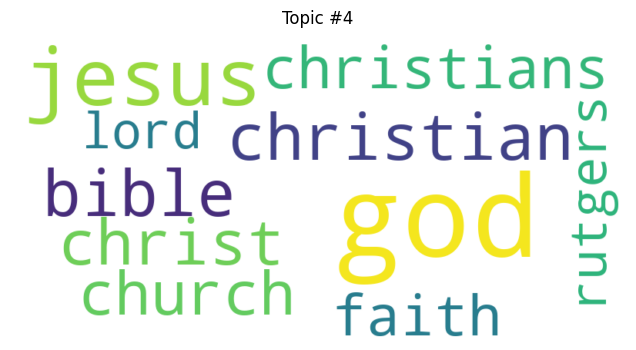

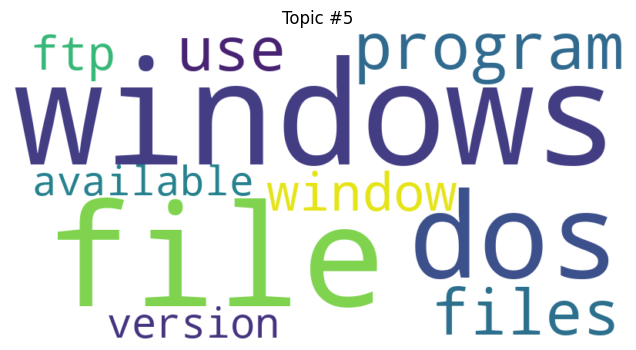

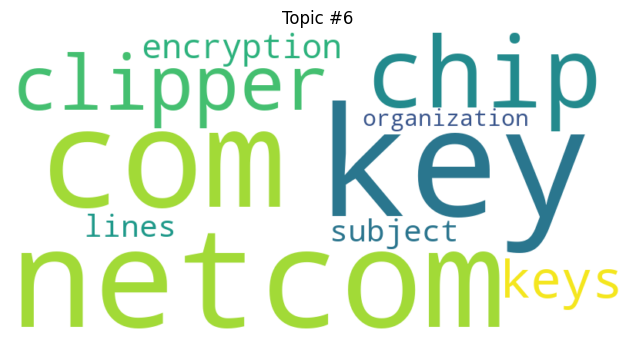

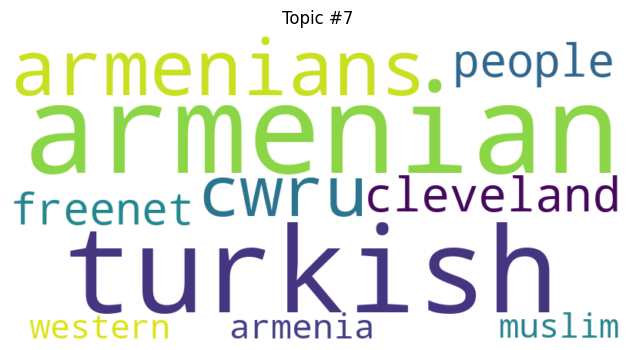

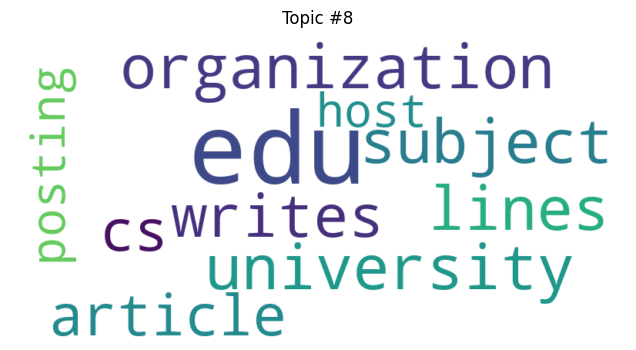

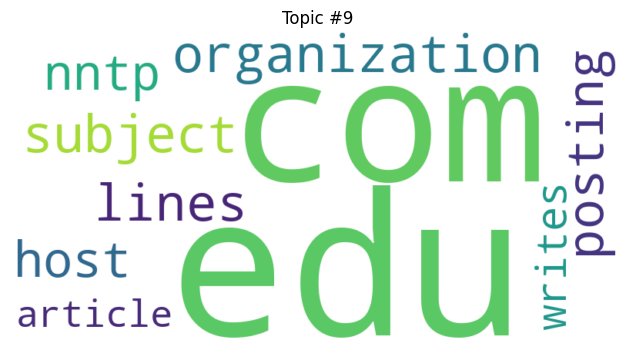

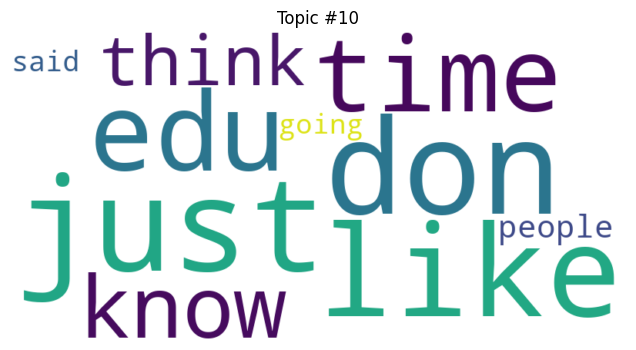

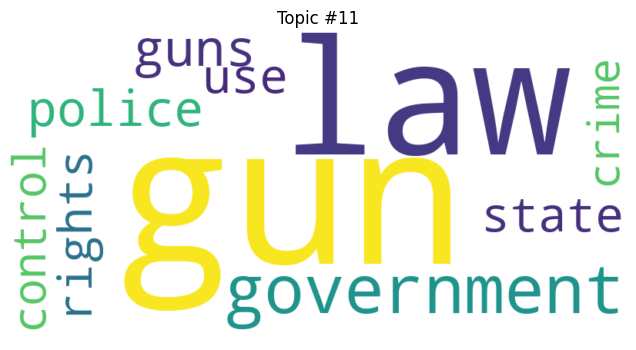

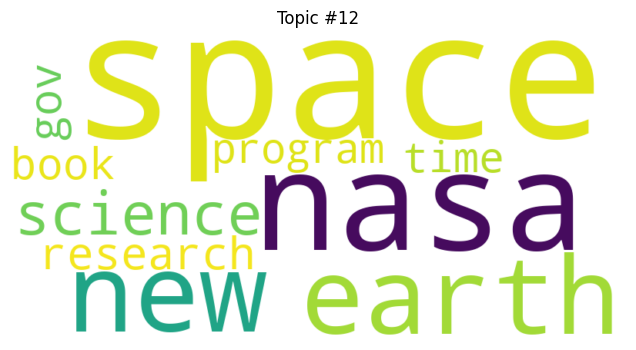

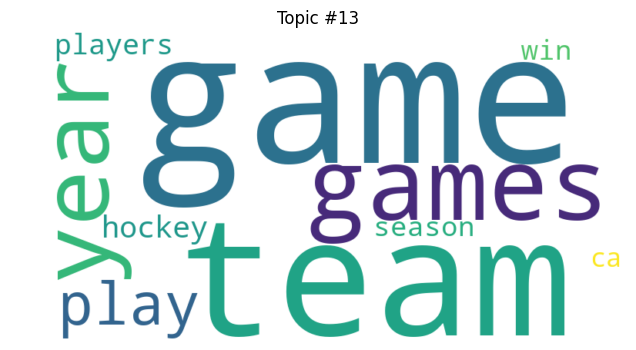

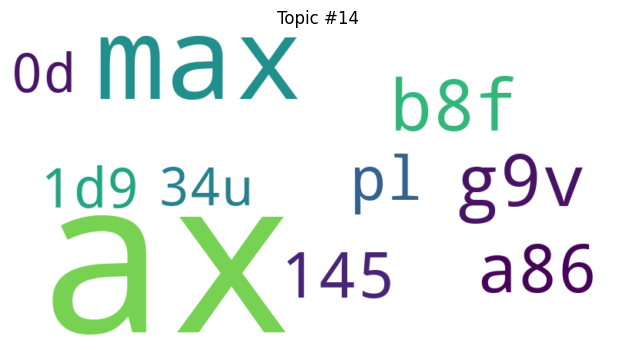

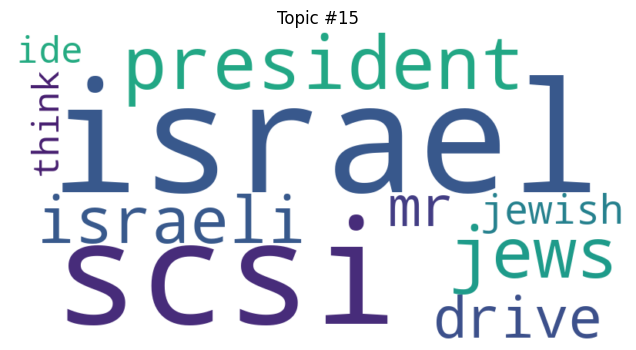

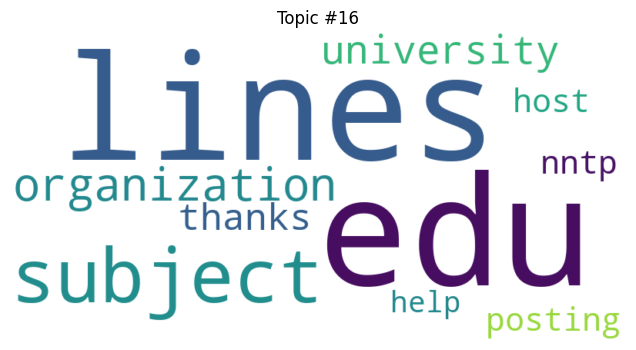

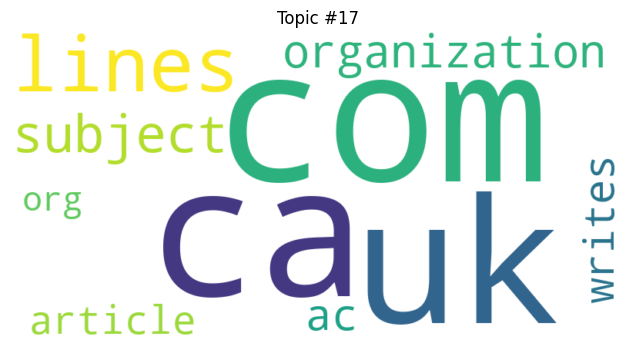

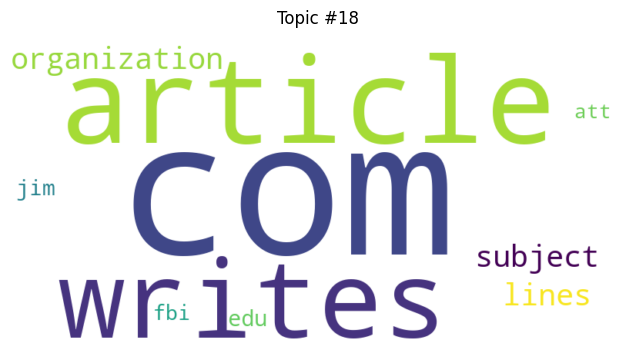

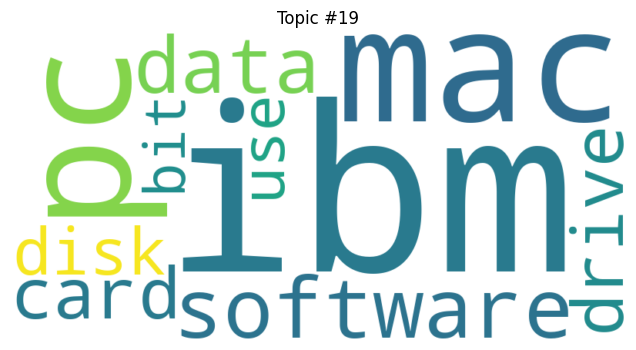

In [5]:
# create wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_idx, topic in enumerate(lda.components_):
    word_freq = {vectorizer.get_feature_names_out()[i]: topic[i]
                 for i in topic.argsort()[:-10 - 1:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic #{topic_idx}')
    plt.show()

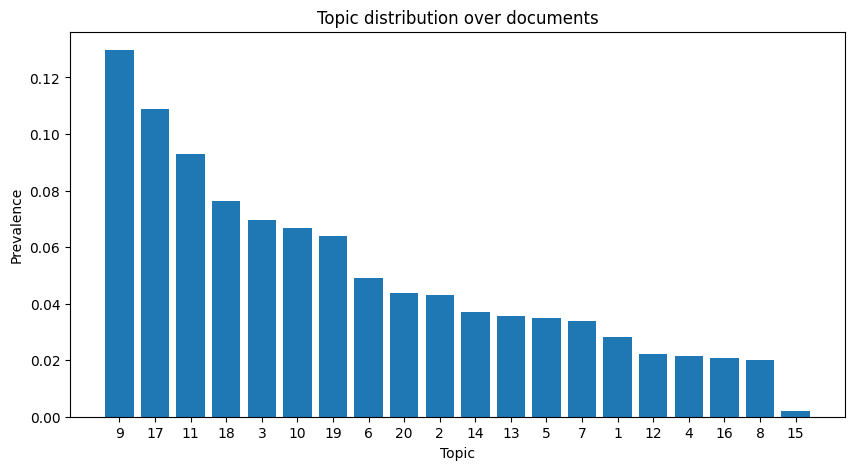

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming lda and data_vectorized are defined
doc_topic_distr = lda.transform(data_vectorized)
doc_topic_distr = np.mean(doc_topic_distr, axis=0)

# Get the indices that would sort the topic distribution
sorted_indices = np.argsort(doc_topic_distr)[::-1]

plt.figure(figsize=(10, 5))

# Use the sorted indices to sort the topic distribution
plt.bar(np.arange(len(doc_topic_distr)), doc_topic_distr[sorted_indices])

# Set x-ticks and x-tick labels
plt.xticks(np.arange(len(doc_topic_distr)), sorted_indices + 1)

plt.xlabel('Topic')
plt.ylabel('Prevalence')
plt.title('Topic distribution over documents')
plt.show()


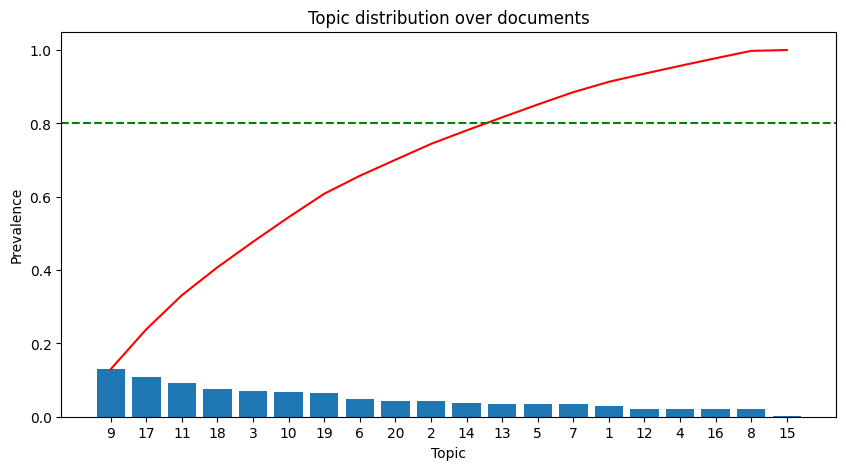

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming lda and data_vectorized are defined
doc_topic_distr = lda.transform(data_vectorized)
doc_topic_distr = np.mean(doc_topic_distr, axis=0)

# Get the indices that would sort the topic distribution
sorted_indices = np.argsort(doc_topic_distr)[::-1]

plt.figure(figsize=(10, 5))

# Use the sorted indices to sort the topic distribution
plt.bar(np.arange(len(doc_topic_distr)), doc_topic_distr[sorted_indices])

# Calculate the cumulative sum of the sorted topic distribution
cumulative_prevalence = np.cumsum(doc_topic_distr[sorted_indices])

# Plot the cumulative prevalence
plt.plot(np.arange(len(doc_topic_distr)), cumulative_prevalence, color='r')

# Draw a horizontal line at 80% cumulative prevalence
plt.axhline(y=0.8, color='g', linestyle='--')

# Set x-ticks and x-tick labels
plt.xticks(np.arange(len(doc_topic_distr)), sorted_indices + 1)

plt.xlabel('Topic')
plt.ylabel('Prevalence')
plt.title('Topic distribution over documents')
plt.show()

In [17]:
# Find the number of topics that explain 80% of the data
num_topics = np.where(cumulative_prevalence > 0.8)[0][0]
print(f'{num_topics} topics explain 80% of the data.')

11 topics explain 80% of the data.


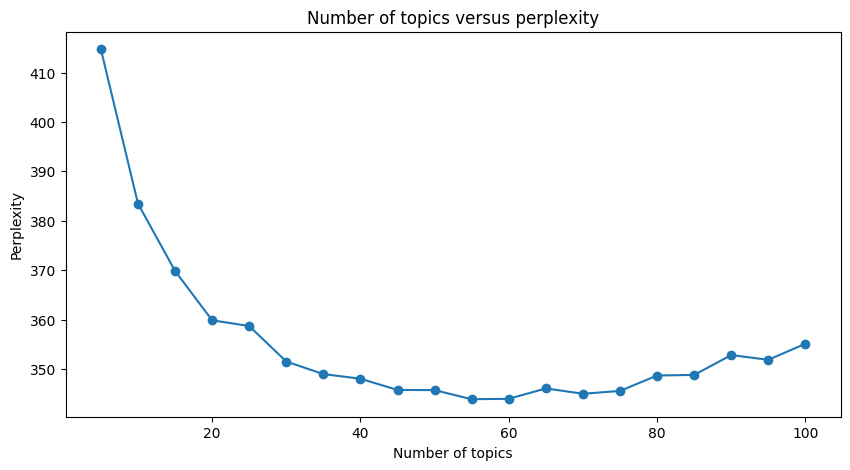

In [18]:
# we can also use the elbow method to find the optimal number of topics
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Assuming data is defined
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
data_vectorized = vectorizer.fit_transform(data)

# Define the number of topics to try
num_topics = np.arange(5, 101, 5)

# Define the perplexity list to store the perplexity scores
perplexity_list = []

# Iterate over the number of topics
for n_topics in num_topics:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(data_vectorized)
    perplexity_list.append(lda.perplexity(data_vectorized))

# Plot the number of topics versus perplexity
plt.figure(figsize=(10, 5))
plt.plot(num_topics, perplexity_list, marker='o')
plt.xlabel('Number of topics')
plt.ylabel('Perplexity')
plt.title('Number of topics versus perplexity')
plt.show()